In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/Users/shrutisahare/Downloads/Fraud.csv')

Getting information about the data

In [17]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [18]:
df.shape

(6362620, 11)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking for null values and duplicates

In [20]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder #converting categorical variables to numeric

objList=['type','nameDest','nameOrig']
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [23]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [24]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.0,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.0,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.0,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.0,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.0,0.00,0,0
5,1,3,7817.71,6026525,53860.00,46042.29,2247218,0.0,0.00,0,0
6,1,3,7107.77,1805947,183195.00,176087.23,2063363,0.0,0.00,0,0
7,1,3,7861.64,2999171,176087.23,168225.59,2314008,0.0,0.00,0,0
8,1,3,4024.36,869140,2671.00,0.00,768940,0.0,0.00,0,0
9,1,2,5337.77,5407276,41720.00,36382.23,282960,41898.0,40348.79,0,0


This shows that the data is highly imbalanced, thus decision trees and random forests are suitable for use.

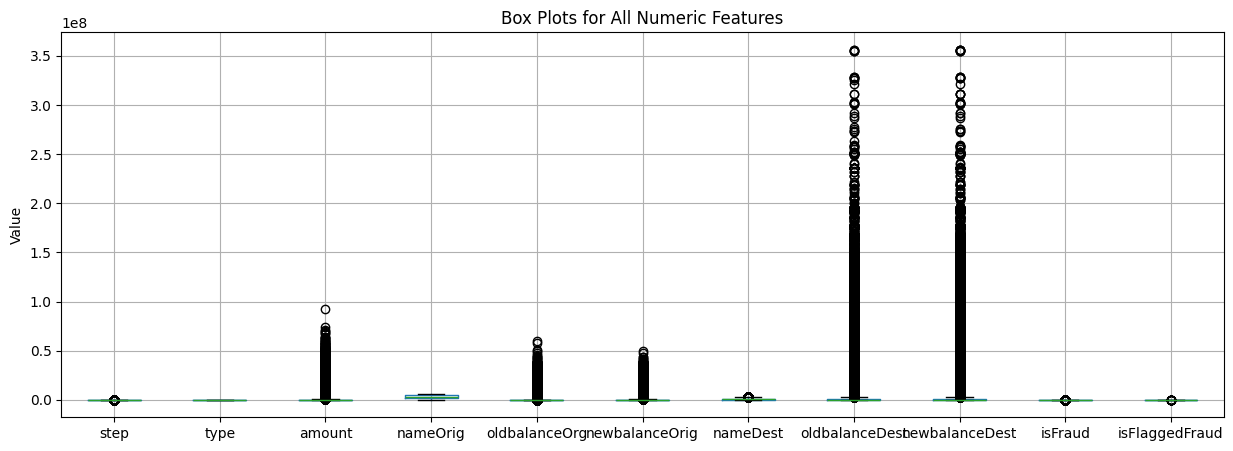

In [25]:
numeric_features = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(15,5))
numeric_features.boxplot()
plt.title('Box Plots for All Numeric Features')
plt.ylabel('Value')
plt.show()

This shows the outliers for each feature present in the data. We will not be handling the outliers present in the amount feature as it displays the fraud transaction and also because Random Forest is robust to outliers.

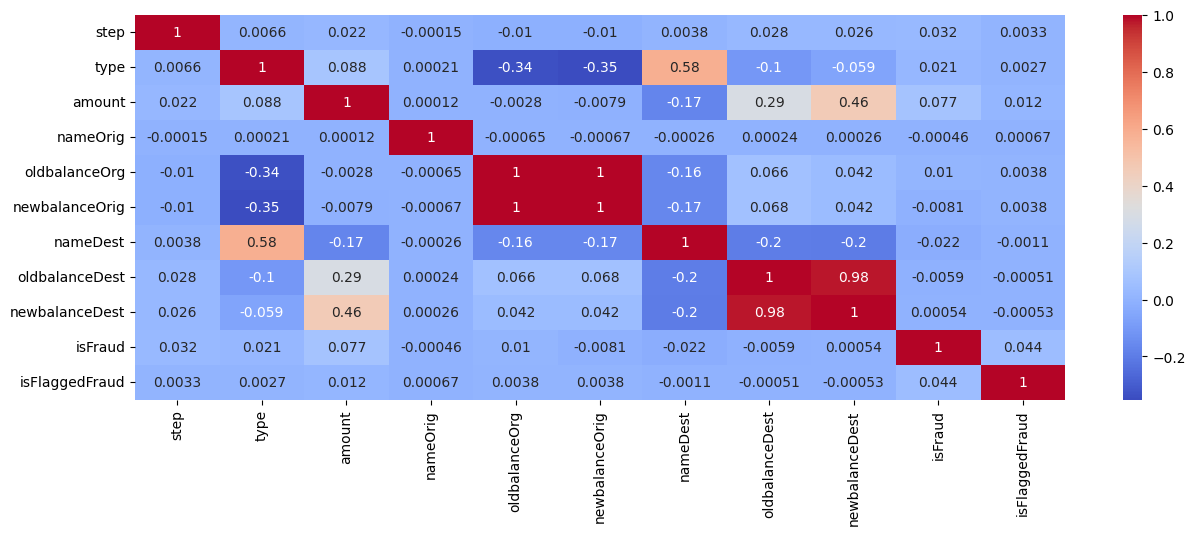

In [26]:
corr_matrix = df.corr()


plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')

plt.show()

From the above heatmap, we can conclude that 
oldbalanceOrg and newbalanceOrig have strong positive correlation and
oldbalanceDest and newbalanceDest have strong positive correlation.
But Random Forest can deal with multicollinearity

Model building

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Splitting the data

In [28]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the data 

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
print("Shape of X_train_scaled: ", X_train_scaled.shape)
print("Shape of X_test_scaled: ", X_test_scaled.shape)

Shape of X_train_scaled:  (5090096, 10)
Shape of X_test_scaled:  (1272524, 10)


Model training

In [39]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [33]:
print(X_train_scaled.shape)
print(len(y_train))

(5090096, 10)
5090096


In [34]:
print(X_train.isnull().sum()) 
print(y_train.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
dtype: int64
0


In [35]:
RandomForest_predictions = RandomForest_model.predict(X_test_scaled)

In [36]:
y_pred = RandomForest_model.predict(X_test_scaled)

In [37]:
print("Random Forest Performance Report:")
print(classification_report(y_test, RandomForest_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, RandomForest_predictions))

Random Forest Performance Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.79      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270883      21]
 [    346    1274]]


In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


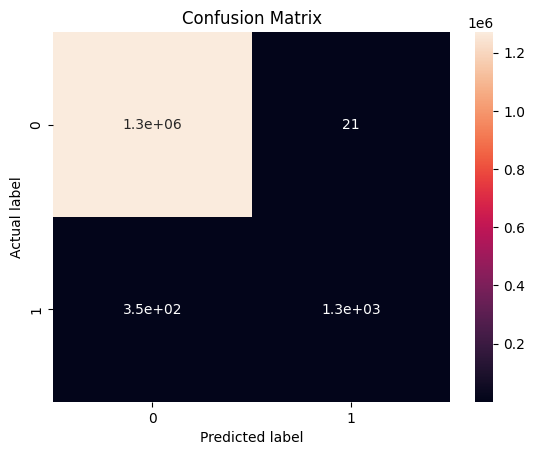

In [52]:
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

Calculation and Ranking of Feature Importance

In [54]:
importances = RandomForest_model.feature_importances_
features = X_train.columns

In [55]:
feature_importances = sorted(zip(importances, features), reverse=True)
print("Feature Importance:")
for importance, feature in feature_importances:
    print(f"{feature}: {importance:.4f}")

Feature Importance:
newbalanceDest: 0.2929
oldbalanceOrg: 0.2647
amount: 0.1411
step: 0.0899
oldbalanceDest: 0.0672
type: 0.0637
newbalanceOrig: 0.0291
nameDest: 0.0256
nameOrig: 0.0250
isFlaggedFraud: 0.0008


In [57]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

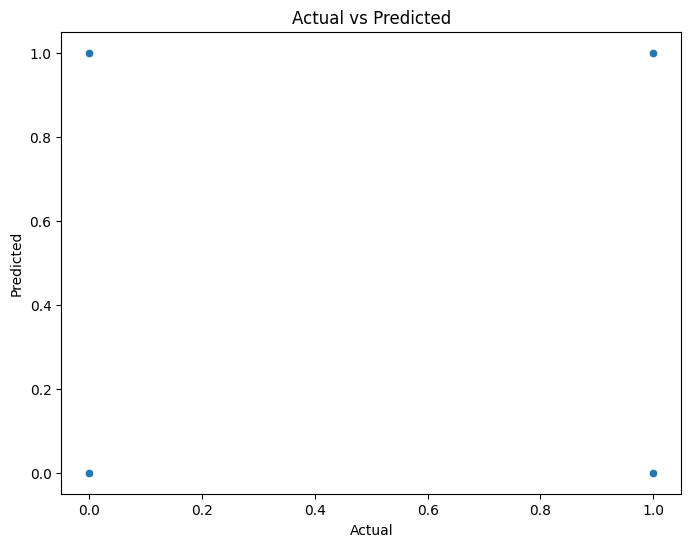

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Random Forest is a powerful tool for detecting online payment fraud, providing high accuracy, robustness, and interpretability. Its ability to handle large and imbalanced datasets makes it a suitable choice for financial businesses aiming to enhance their fraud detection systems. By leveraging this algorithm, businesses can minimize their exposure to fraudulent activities, ensuring a safer and more secure online payment experience for their customers.

What are the key factors that predict fraudulent customer?
1. Transaction Amount:
Unusually high or low transaction amounts compared to a customer’s typical behavior can be a red flag.
2. Transaction Frequency:
A sudden increase in transaction frequency (e.g., multiple transactions in a short period) can indicate fraudulent activity.
3. Device Information:
The type of device used for transactions (e.g., mobile, desktop) and whether it’s a previously used device can provide insights into the legitimacy of the transaction.


What kind of prevention should be adopted while company update its infrastructure?
1. Comprehensive Risk Assessment:
Conduct a thorough risk assessment to identify potential vulnerabilities and the impact of changes on existing systems.
2. Data Backup and Recovery Planning:
Ensure regular backups of all critical data before any infrastructure changes. Implement a robust disaster recovery plan to restore operations quickly in case of data loss.
3. Security Protocols:
Update security protocols and ensure they are compatible with the new infrastructure. This includes firewalls, intrusion detection systems, and endpoint security measures.
4. User Training and Awareness:
Provide training to employees on new systems and best practices for security. Raising awareness about phishing, social engineering, and other threats can prevent human errors.

Assuming these actions have been implemented, how would you determine if they work?
1. Monitoring and Logging
2. Key Performance Indicators (KPIs)
3. Security Audits